# BGC analysis

Author: Sandra Godinho Silva \
Creation date: 2/10/2020 \
Version: 0.3

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Metadata

In [4]:
metadata = pd.read_csv("All_info.csv")
metadata.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High,5192,3948,1843,3127,244,76.040062,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Number BGCs per type

In [47]:
bgc = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgc = bgc.set_index("index").T
bgc["Nr_BGCs"] = bgc.sum(axis=1)
bgc.head()

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7


In [48]:
bgc.sort_values(by="Nr_BGCs",ascending=False)

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_902728265.1,24,1,2,1,0,0,0,3,0,0,0,31
GCA_008370685.1,5,3,0,3,0,1,1,4,1,3,2,23
GCA_902804485.1,11,2,0,3,1,0,1,1,1,2,0,22
GCA_000430665.1,8,1,2,1,0,1,0,0,1,2,4,20
GCA_003709475.1,9,3,3,2,0,0,0,2,0,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_002682935.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_900112595.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_008056315.1,0,0,0,0,0,0,0,0,0,1,0,1
GCA_002426785.1,0,0,0,0,0,0,0,0,0,1,0,1


## All information about each BGC

In [7]:
bgc_info = pd.read_csv("../../3_Annotation/antismash_results/all_BGC_info.csv")
bgc_info = bgc_info.rename(columns={"Most_similar_known_ cluster":"Most_similar_known_cluster"})
bgc_info.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name
0,GCA_002831645.1,Region&nbsp1,T3PKS,PKSIII,582350.0,623402,41052.0,NaN,NaN,NaN,GCA_002831645_contig1.region001
1,GCA_002831645.1,Region&nbsp2,"terpene,bacteriocin",Others,1879449.0,1909353,29904.0,NaN,NaN,NaN,GCA_002831645_contig1.region002


In [8]:
len(bgc_info)

9330

In [9]:
bgc_known = bgc_info[bgc_info["Most_similar_classif"].notnull()]
bgc_known.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name
2,GCA_002831645.1,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645_contig1.region003
5,GCA_001971785.1,Region&nbsp2,terpene,terpene,2834169.0,2855008,20839.0,carotenoid,Terpene,28%,GCA_001971785_contig1.region002


In [10]:
len(bgc_known)

4344

In [11]:
100-len(bgc_known)/len(bgc_info)*100

53.440514469453376

### Merge with metadata:

In [12]:
bgc_metadata = pd.merge(bgc_info, metadata, how="left", left_on="Genome", right_on="Assembly accession")
bgc_metadata["Family"].value_counts()
#a = bgc_metadata[bgc_metadata["Family"]!="Flavobacteriaceae"] 
#a[a["Family"] !="Weeksellaceae"]

Flavobacteriaceae    6165
Weeksellaceae        3163
Name: Family, dtype: int64

Flavobacteriaceae has more two genomes that are currently without taxnomic identification

In [13]:
bgc_known_metadata = pd.merge(bgc_known, metadata, how="left", left_on="Genome", right_on="Assembly accession")
#bgc_known_metadata = merged.set_index("Genome")
bgc_known_metadata.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_002831645.1,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645_contig1.region003,GCA_002831645.1,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),99.67,0.33,0.0,98.02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,1,1,4314320,4314320,0.0,1,4314320,1,4314320,1,4314320,1,4314320,4314320,4314320,1,100.0,0.32759,0.0,High,3835,2862,1368,2230,90,74.628422,35.671447,58.148631,2.346806,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...,NaN,GCF_002831645.1,CP025117,NaN,Olleya sp. Bg11-27,NaN,Full,Complete,NaN,"USA: n

In [14]:
#bgc_known_metadata.groupby(["Most_similar_known_cluster","Family"]).count()

In [15]:
df = bgc_known_metadata.groupby(["Family", "Most_similar_known_cluster"]).count()["Genome"].reset_index().rename(columns={"Genome":"Counts per family"})
df = df.pivot(index='Most_similar_known_cluster', columns='Family', values='Counts per family')
df1 = df.fillna(0).reset_index()
df1.head()

Family,Most_similar_known_cluster,Flavobacteriaceae,Weeksellaceae
0,1-heptadecene,4.0,0.0
1,"1-nonadecene / (14Z)-1,14-nonadecadiene",1.0,0.0
2,CDA1b / CDA2a / CDA2b / CDA3a / CDA3b / CDA4a ...,1.0,2.0
3,ET-743,29.0,0.0
4,K53 capsular polysaccharide,1.0,1.0


## Known clusters

In [16]:
df = bgc_known["Most_similar_known_cluster"].value_counts().rename_axis('BGC').reset_index(name='counts')

In [17]:
merge= pd.merge(df, df1, how="left", left_on="BGC", right_on="Most_similar_known_cluster")
merge.head()

,BGC,counts,Most_similar_known_cluster,Flavobacteriaceae,Weeksellaceae
0,carotenoid,2117,carotenoid,1584.0,533.0
1,flexirubin,1234,flexirubin,828.0,406.0
2,putrebactin / avaroferrin,392,putrebactin / avaroferrin,53.0,339.0
3,bisucaberin B,180,bisucaberin B,143.0,37.0
4,bacillomycin D,64,bacillomycin D,62.0,2.0


In [18]:
bgc_known_cluster = bgc_known.groupby("Most_similar_known_cluster").count()
#bgc_known_cluster["Genome"].value_counts()
bgc_known_cluster.head()

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_classif,Similarity,Correct_name
Most_similar_known_cluster,,,,,,,,,,
1-heptadecene,4,4,4,4,4,4,4,4,4,4
"1-nonadecene / (14Z)-1,14-nonadecadiene",1,1,1,1,1,1,1,1,1,1
CDA1b / CDA2a / CDA2b / CDA3a / CDA3b / CDA4a / CDA4b,3,3,3,3,3,3,3,3,3,3
ET-743,29,29,29,29,29,29,29,29,29,29
K53 capsular polysaccharide,2,2,2,2,2,2,2,2,2,2


In [19]:
bgc["Known_cluster_count"] = bgc_known.groupby(['Genome']).count()["Most_similar_known_cluster"]
bgc.head()

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Known_cluster_count
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4,1.0
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2,1.0
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2,2.0
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8,2.0
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7,2.0


## BGC types with metadata

In [20]:
merged = pd.merge(bgc, metadata, how="left", left_index=True, right_on="Assembly accession")
merged = merged.set_index("Assembly accession")
merged.head(2)

,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Known_cluster_count,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
Assembly accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4,1.0,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),99.67,0.33,0.0,98.02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,1.0,1.0,4314320.0,4314320.0,0.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,4314320.0,4314320.0,1.0,100.0,0.32759,0.0,High,3835.0,2862.0,1368.0,2230.0,90.0,74.628422,35.671447,58.148631,2.346806,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,Na

In [21]:
merged.Family.value_counts()

Flavobacteriaceae    1860
Weeksellaceae         681
Name: Family, dtype: int64

### Conversions

In [22]:
numerical = merged.select_dtypes(include="int")
numerical.head(2)

""
Assembly accession
GCA_002831645.1
GCA_001971785.1


In [23]:
categorical = merged.select_dtypes(include="object")
categorical.head(2)

,Bin_Id,Marker lineage,classification,Domain,Phyla,Class,Order,Family,Genus,Species,Classification_quality,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
Assembly accession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCA_002831645.1,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,High,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...,NaN,GCF_002831645.1,CP025117,NaN,Olleya sp. Bg11-27,NaN,Full,Complete,NaN,"USA: near Point Barrow, Alaska","near Point Barrow, Alaska",USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=Bg11-27,NaN,"Bg11 medium, 4deg C",NaN,NaN,United States,NaN,sea ice,Collins,71.3,NaN,-157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University of Alaska Fairbanks,NaN,Olleya sp. Bg11-27,Olleya sp. Bg11-27,NaN,env_biome:marine biome,NaN,identical,NaN,NaN,NaN,NaN,2017-12-04T00:00:00.000,NaN,NaN,NaN,NaN,NaN,Major,NaN,NaN,SAMN08125748,Olleya_Bg11-27,NaN,2017/12/11,University of Alaska Fairbanks,107x,NaN,Illumina MiSeq + ONT MinION,Illumina; Oxford Nanopore,NaN,NaN,NaN,NaN,Bg11-27,NaN,NaN,MIGS.ba,MIGS.ba.water.5.0,University of Alaska Fairbanks,NaN

In [24]:
bgc_types = merged[["NRPS", "NRPS_other", "PKSI", "PKSIII",  "PKS_other", "RiPPs", "Others", "Siderophore", "terpene","transAT_PSK", 
                    "Genus", "Family", "Nr_BGCs", "Origin", "Known_cluster_count", "MAG"]]

In [25]:
bgc_flavo = bgc_types[bgc_types["Family"] == "Flavobacteriaceae"]

In [26]:
bgc_types.sort_values(by="Nr_BGCs", ascending=False).head(3)

,NRPS,NRPS_other,PKSI,PKSIII,PKS_other,RiPPs,Others,Siderophore,terpene,transAT_PSK,Genus,Family,Nr_BGCs,Origin,Known_cluster_count,MAG
Assembly accession,,,,,,,,,,,,,,,,
GCA_902728265.1,24,2,0,0,0,3,1,0,0,0,Chryseobacterium,Weeksellaceae,31,Non_marine,5.0,False
GCA_008370685.1,5,0,0,1,1,4,3,1,3,2,Aquimarina,Flavobacteriaceae,23,Unclassified,5.0,False
GCA_902804485.1,11,0,1,0,1,1,3,1,2,0,Flavobacterium,Flavobacteriaceae,22,Unclassified,5.0,False


In [27]:
mean = bgc_types.groupby(['Genus', "Family"]).mean()
mean = mean.reset_index()
mean= mean[["Genus","Family", "Nr_BGCs", "Known_cluster_count"]]
mean = mean[mean["Family"]=="Flavobacteriaceae"][mean["Genus"]!="Aquimarina"][mean["Genus"]!="Kordia"].mean().to_frame()
mean.head()


<ipython-input-27-5e4133e5f57a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = mean[mean["Family"]=="Flavobacteriaceae"][mean["Genus"]!="Aquimarina"][mean["Genus"]!="Kordia"].mean().to_frame()


,0
Nr_BGCs,2.531662
Known_cluster_count,1.447238


In [28]:
mean = bgc_types.groupby(['Genus', "Family"]).mean()
mean = mean.reset_index()
mean= mean[["Genus","Family", "Nr_BGCs", "Known_cluster_count"]]
mean = mean[mean["Genus"]=="Kordia"]#.mean().to_frame()
mean.head()

,Genus,Family,Nr_BGCs,Known_cluster_count
76,Kordia,Flavobacteriaceae,9.375,2.0


In [29]:
mean = bgc_types.groupby(['Genus', "Family"]).mean()
mean = mean.reset_index()
mean= mean[["Genus","Family", "Nr_BGCs", "Known_cluster_count"]]
mean = mean[mean["Genus"]== "Aquimarina"]#.mean().to_frame()
mean.head()

,Genus,Family,Nr_BGCs,Known_cluster_count
12,Aquimarina,Flavobacteriaceae,9.512821,3.128205


In [30]:
final = bgc_types.groupby(['Genus']).filter(lambda x:x['Genus'].count()>5).groupby(['Genus', "Family"]).describe().round(1)
finalx = final.reset_index()
finalx= finalx.T.reset_index()
finalx["Stats"]= finalx[['level_0', 'level_1']].agg('_'.join, axis=1)
finalx = finalx.set_index("Stats")
finalx = finalx.drop(columns=['level_0', 'level_1'])
finalx= finalx.T
finalx = finalx.rename(columns={"Genus_":"Genus", "Family_":"Family"})
#finalx = finalx.sort_values(by="orfs_count", ascending=False)
finalx = finalx.sort_values(by="Family", ascending=False)
finalx.head()

Stats,Genus,Family,NRPS_count,NRPS_mean,NRPS_std,NRPS_min,NRPS_25%,NRPS_50%,NRPS_75%,NRPS_max,NRPS_other_count,NRPS_other_mean,NRPS_other_std,NRPS_other_min,NRPS_other_25%,NRPS_other_50%,NRPS_other_75%,NRPS_other_max,PKSI_count,PKSI_mean,PKSI_std,PKSI_min,PKSI_25%,PKSI_50%,PKSI_75%,PKSI_max,PKSIII_count,PKSIII_mean,PKSIII_std,PKSIII_min,PKSIII_25%,PKSIII_50%,PKSIII_75%,PKSIII_max,PKS_other_count,PKS_other_mean,PKS_other_std,PKS_other_min,PKS_other_25%,PKS_other_50%,PKS_other_75%,PKS_other_max,RiPPs_count,RiPPs_mean,RiPPs_std,RiPPs_min,RiPPs_25%,RiPPs_50%,RiPPs_75%,RiPPs_max,Others_count,Others_mean,Others_std,Others_min,Others_25%,Others_50%,Others_75%,Others_max,Siderophore_count,Siderophore_mean,Siderophore_std,Siderophore_min,Siderophore_25%,Siderophore_50%,Siderophore_75%,Siderophore_max,terpene_count,terpene_mean,terpene_std,terpene_min,terpene_25%,terpene_50%,terpene_75%,terpene_max,transAT_PSK_count,transAT_PSK_mean,transAT_PSK_std,transAT_PSK_min,transAT_PSK_25%,transAT_PSK_50%,transAT_PSK_75%,transAT_PSK_max,Nr_BGCs_count,Nr_BGCs_mean,Nr_BGCs_std,Nr_BGCs_min,Nr_BGCs_25%,Nr_BGCs_50%,Nr_BGCs_75%,Nr_BGCs_max,Known_cluster_count_count,Known_cluster_count_mean,Known_cluster_count_std,Known_cluster_count_min,Known_cluster_count_25%,Known_cluster_count_50%,Known_cluster_count_75%,Known_cluster_count_max
10,Chryseobacterium,Weeksellaceae,294,1.3,1.9,0,0,1,2,24,294,0.2,0.5,0,0,0,0,3,294,0,0.1,0,0,0,0,2,294,0,0,0,0,0,0,0,294,0.7,0.5,0,0,1,1,2,294,2.4,1.3,0,2,2,3,6,294,1.2,0.5,1,1,1,1,5,294,0.7,0.5,0,0,1,1,2,294,1.1,1.1,0,0,1,1,6,294,0,0,0,0,0,0,0,294,7.7,3.4,1,6,8,9,31,294,2.8,0.8,1,2,3,3,7
3,Apibacter,Weeksellaceae,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1,0,1,1,1,1,1,21,0,0,0,0,0,0,0,21,0.1,0.3,0,0,0,0,1,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1.1,0.3,1,1,1,1,2,2,1,0,1,1,1,1,1
25,Kaistella,Weeksellaceae,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0.6,0.5,0,0,1,1,1,48,0,0,0,0,0,0,0,48,0,0.1,0,0,0,0,1,48,0,0.2,0,0,0,0,1,48,0,0,0,0,0,0,0,48,1.2,0.5,0,1,1,1,2,48,0,0,0,0,0,0,0,48,1.9,0.8,1,1,2,2.2,3,45,1,0,1,1,1,1,1
17,Epilithonimonas,Weeksellaceae,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0.5,0.7,0,0,0,1,3,31,0.5,0.7,0,0,0,1,2,31,0,0,0,0,0,0,0,31,1,0.3,0,1,1,1,2,31,0,0,0,0,0,0,0,31,2,0.9,1,1,2,2.5,5,29,1.6,0.6,1,1,1,2,3
16,Empedobacter,Weeksellaceae,41,0,0.2,0,0,0,0,1,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0.2,0.4,0,0,0,0,1,41,1.2,0.7,0,1,1,1,3,41,0,0,0,0,0,0,0,41,0.8,0.5,0,1,1,1,2,41,0,0,0,0,0,0,0,41,2.3,0.8,1,2,2,3,5,39,2,0.7,1,2,2,2,4


In [31]:
finalx.head()

Stats,Genus,Family,NRPS_count,NRPS_mean,NRPS_std,NRPS_min,NRPS_25%,NRPS_50%,NRPS_75%,NRPS_max,NRPS_other_count,NRPS_other_mean,NRPS_other_std,NRPS_other_min,NRPS_other_25%,NRPS_other_50%,NRPS_other_75%,NRPS_other_max,PKSI_count,PKSI_mean,PKSI_std,PKSI_min,PKSI_25%,PKSI_50%,PKSI_75%,PKSI_max,PKSIII_count,PKSIII_mean,PKSIII_std,PKSIII_min,PKSIII_25%,PKSIII_50%,PKSIII_75%,PKSIII_max,PKS_other_count,PKS_other_mean,PKS_other_std,PKS_other_min,PKS_other_25%,PKS_other_50%,PKS_other_75%,PKS_other_max,RiPPs_count,RiPPs_mean,RiPPs_std,RiPPs_min,RiPPs_25%,RiPPs_50%,RiPPs_75%,RiPPs_max,Others_count,Others_mean,Others_std,Others_min,Others_25%,Others_50%,Others_75%,Others_max,Siderophore_count,Siderophore_mean,Siderophore_std,Siderophore_min,Siderophore_25%,Siderophore_50%,Siderophore_75%,Siderophore_max,terpene_count,terpene_mean,terpene_std,terpene_min,terpene_25%,terpene_50%,terpene_75%,terpene_max,transAT_PSK_count,transAT_PSK_mean,transAT_PSK_std,transAT_PSK_min,transAT_PSK_25%,transAT_PSK_50%,transAT_PSK_75%,transAT_PSK_max,Nr_BGCs_count,Nr_BGCs_mean,Nr_BGCs_std,Nr_BGCs_min,Nr_BGCs_25%,Nr_BGCs_50%,Nr_BGCs_75%,Nr_BGCs_max,Known_cluster_count_count,Known_cluster_count_mean,Known_cluster_count_std,Known_cluster_count_min,Known_cluster_count_25%,Known_cluster_count_50%,Known_cluster_count_75%,Known_cluster_count_max
10,Chryseobacterium,Weeksellaceae,294,1.3,1.9,0,0,1,2,24,294,0.2,0.5,0,0,0,0,3,294,0,0.1,0,0,0,0,2,294,0,0,0,0,0,0,0,294,0.7,0.5,0,0,1,1,2,294,2.4,1.3,0,2,2,3,6,294,1.2,0.5,1,1,1,1,5,294,0.7,0.5,0,0,1,1,2,294,1.1,1.1,0,0,1,1,6,294,0,0,0,0,0,0,0,294,7.7,3.4,1,6,8,9,31,294,2.8,0.8,1,2,3,3,7
3,Apibacter,Weeksellaceae,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1,0,1,1,1,1,1,21,0,0,0,0,0,0,0,21,0.1,0.3,0,0,0,0,1,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1.1,0.3,1,1,1,1,2,2,1,0,1,1,1,1,1
25,Kaistella,Weeksellaceae,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0.6,0.5,0,0,1,1,1,48,0,0,0,0,0,0,0,48,0,0.1,0,0,0,0,1,48,0,0.2,0,0,0,0,1,48,0,0,0,0,0,0,0,48,1.2,0.5,0,1,1,1,2,48,0,0,0,0,0,0,0,48,1.9,0.8,1,1,2,2.2,3,45,1,0,1,1,1,1,1
17,Epilithonimonas,Weeksellaceae,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0.5,0.7,0,0,0,1,3,31,0.5,0.7,0,0,0,1,2,31,0,0,0,0,0,0,0,31,1,0.3,0,1,1,1,2,31,0,0,0,0,0,0,0,31,2,0.9,1,1,2,2.5,5,29,1.6,0.6,1,1,1,2,3
16,Empedobacter,Weeksellaceae,41,0,0.2,0,0,0,0,1,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0.2,0.4,0,0,0,0,1,41,1.2,0.7,0,1,1,1,3,41,0,0,0,0,0,0,0,41,0.8,0.5,0,1,1,1,2,41,0,0,0,0,0,0,0,41,2.3,0.8,1,2,2,3,5,39,2,0.7,1,2,2,2,4


In [32]:
bgcs_mean = bgc_types.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
bgcs_mean = bgcs_mean.reset_index().set_index("Genus")
bgcs_mean = bgcs_mean.fillna(0)
bgcs_mean = bgcs_mean.sort_values(by=["Family", "Genus"])
bgcs_mean.head()

,Family,NRPS,NRPS_other,PKSI,PKSIII,PKS_other,RiPPs,Others,Siderophore,terpene,transAT_PSK,Nr_BGCs,Known_cluster_count
Genus,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,0.000000,0.000000,0.0,0.904762,0.000000,0.000000,1.023810,0.000000,1.023810,0.00000,2.952381,1.976190
Algibacter,Flavobacteriaceae,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.777778,1.111111
Aquimarina,Flavobacteriaceae,1.769231,0.076923,0.0,0.923077,0.076923,1.564103,0.948718,0.846154,2.000000,0.74359,9.512821,3.128205
Arenibacter,Flavobacteriaceae,0.272727,0.000000,0.0,0.954545,0.000000,0.045455,0.727273,0.000000,2.681818,0.00000,4.681818,1.681818
BACL21,Flavobacteriaceae,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.071429,0.00000,1.071429,1.083333


## Significance

In [33]:
import pingouin as pg

In [34]:
df = bgc_types.groupby(['Genus']).filter(lambda x:x['Genus'].count()>5).reset_index()
df.head()

,Assembly accession,NRPS,NRPS_other,PKSI,PKSIII,PKS_other,RiPPs,Others,Siderophore,terpene,transAT_PSK,Genus,Family,Nr_BGCs,Origin,Known_cluster_count,MAG
0,GCA_002831645.1,0,0,0,1,0,1,1,0,1,0,Olleya,Flavobacteriaceae,4,Marine,1.0,False
1,GCA_002951395.1,0,0,0,0,0,0,0,1,1,0,Elizabethkingia,Weeksellaceae,2,Non_marine,2.0,False
2,GCA_903969135.1,1,0,0,0,1,3,1,1,1,0,Chryseobacterium,Weeksellaceae,8,Non_marine,2.0,False
3,GCA_009664855.1,0,0,0,1,0,2,2,0,2,0,Flavobacterium,Flavobacteriaceae,7,Non_marine,2.0,False
4,GCA_001693415.1,0,0,0,0,0,0,1,0,1,0,Tenacibaculum,Flavobacteriaceae,2,Unclassified,1.0,False


In [35]:
pg.homoscedasticity(df[["Genus", "Nr_BGCs"]], group= "Genus", dv="Nr_BGCs")

,W,pval,equal_var
levene,6.128718,1.065113e-45,False


In [36]:
pg.kruskal(df[["Genus", "Nr_BGCs"]], between = "Genus", dv="Nr_BGCs")

C:\Users\Sandra\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Source,ddof1,H,p-unc
Kruskal,Genus,67,1234.184069,3.407060e-214


In [37]:
pg.homoscedasticity(df[["MAG", "Nr_BGCs"]], group= "MAG", dv="Nr_BGCs")

,W,pval,equal_var
levene,54.028079,2.733266e-13,False


In [38]:
pg.kruskal(df[["MAG", "Nr_BGCs"]], between = "MAG", dv="Nr_BGCs")

,Source,ddof1,H,p-unc
Kruskal,MAG,1,184.140203,6.046462e-42


In [39]:
pg.homoscedasticity(df[["Origin", "Nr_BGCs"]], group= "Origin", dv="Nr_BGCs")

,W,pval,equal_var
levene,21.745161,4.410481e-10,False


In [40]:
pg.kruskal(df[["Origin", "Nr_BGCs"]], between = "Origin", dv="Nr_BGCs")

,Source,ddof1,H,p-unc
Kruskal,Origin,2,60.176178,8.568582e-14


Kruskal

'H': The Kruskal-Wallis H statistic, corrected for ties

'p-unc': Uncorrected p-value

'dof': degrees of freedom

levene

'W/T': Test statistic (‘W’ for Levene, ‘T’ for Bartlett)

'pval': p-value

'equal_var': True if data has equal variance

In [41]:
forstats = bgc_types.reset_index()
forstats = forstats[["Genus", "Nr_BGCs"]]
forstats.head()


,Genus,Nr_BGCs
0,Olleya,4
1,Seonamhaeicola,2
2,Elizabethkingia,2
3,Chryseobacterium,8
4,Flavobacterium,7


In [42]:
#bgcs_mean.reset_index()[["Genus", "Nr_BGCs"]],
pg.homoscedasticity(forstats, group="Genus", dv="Nr_BGCs")

,W,pval,equal_var
levene,3.092546,8.319376e-33,False


In [43]:
d = {}
for index, row in forstats.iterrows():
    #print(row['Genus'], row['Nr_BGCs'])
    genus = row['Genus']
    value = row['Nr_BGCs']
    try: 
        d[genus].append(value)
    except:
        d[genus] = []
        d[genus].append(value)

# Plots

In [44]:
finalx.head()

Stats,Genus,Family,NRPS_count,NRPS_mean,NRPS_std,NRPS_min,NRPS_25%,NRPS_50%,NRPS_75%,NRPS_max,NRPS_other_count,NRPS_other_mean,NRPS_other_std,NRPS_other_min,NRPS_other_25%,NRPS_other_50%,NRPS_other_75%,NRPS_other_max,PKSI_count,PKSI_mean,PKSI_std,PKSI_min,PKSI_25%,PKSI_50%,PKSI_75%,PKSI_max,PKSIII_count,PKSIII_mean,PKSIII_std,PKSIII_min,PKSIII_25%,PKSIII_50%,PKSIII_75%,PKSIII_max,PKS_other_count,PKS_other_mean,PKS_other_std,PKS_other_min,PKS_other_25%,PKS_other_50%,PKS_other_75%,PKS_other_max,RiPPs_count,RiPPs_mean,RiPPs_std,RiPPs_min,RiPPs_25%,RiPPs_50%,RiPPs_75%,RiPPs_max,Others_count,Others_mean,Others_std,Others_min,Others_25%,Others_50%,Others_75%,Others_max,Siderophore_count,Siderophore_mean,Siderophore_std,Siderophore_min,Siderophore_25%,Siderophore_50%,Siderophore_75%,Siderophore_max,terpene_count,terpene_mean,terpene_std,terpene_min,terpene_25%,terpene_50%,terpene_75%,terpene_max,transAT_PSK_count,transAT_PSK_mean,transAT_PSK_std,transAT_PSK_min,transAT_PSK_25%,transAT_PSK_50%,transAT_PSK_75%,transAT_PSK_max,Nr_BGCs_count,Nr_BGCs_mean,Nr_BGCs_std,Nr_BGCs_min,Nr_BGCs_25%,Nr_BGCs_50%,Nr_BGCs_75%,Nr_BGCs_max,Known_cluster_count_count,Known_cluster_count_mean,Known_cluster_count_std,Known_cluster_count_min,Known_cluster_count_25%,Known_cluster_count_50%,Known_cluster_count_75%,Known_cluster_count_max
10,Chryseobacterium,Weeksellaceae,294,1.3,1.9,0,0,1,2,24,294,0.2,0.5,0,0,0,0,3,294,0,0.1,0,0,0,0,2,294,0,0,0,0,0,0,0,294,0.7,0.5,0,0,1,1,2,294,2.4,1.3,0,2,2,3,6,294,1.2,0.5,1,1,1,1,5,294,0.7,0.5,0,0,1,1,2,294,1.1,1.1,0,0,1,1,6,294,0,0,0,0,0,0,0,294,7.7,3.4,1,6,8,9,31,294,2.8,0.8,1,2,3,3,7
3,Apibacter,Weeksellaceae,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1,0,1,1,1,1,1,21,0,0,0,0,0,0,0,21,0.1,0.3,0,0,0,0,1,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,21,1.1,0.3,1,1,1,1,2,2,1,0,1,1,1,1,1
25,Kaistella,Weeksellaceae,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,48,0.6,0.5,0,0,1,1,1,48,0,0,0,0,0,0,0,48,0,0.1,0,0,0,0,1,48,0,0.2,0,0,0,0,1,48,0,0,0,0,0,0,0,48,1.2,0.5,0,1,1,1,2,48,0,0,0,0,0,0,0,48,1.9,0.8,1,1,2,2.2,3,45,1,0,1,1,1,1,1
17,Epilithonimonas,Weeksellaceae,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,31,0.5,0.7,0,0,0,1,3,31,0.5,0.7,0,0,0,1,2,31,0,0,0,0,0,0,0,31,1,0.3,0,1,1,1,2,31,0,0,0,0,0,0,0,31,2,0.9,1,1,2,2.5,5,29,1.6,0.6,1,1,1,2,3
16,Empedobacter,Weeksellaceae,41,0,0.2,0,0,0,0,1,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,41,0.2,0.4,0,0,0,0,1,41,1.2,0.7,0,1,1,1,3,41,0,0,0,0,0,0,0,41,0.8,0.5,0,1,1,1,2,41,0,0,0,0,0,0,0,41,2.3,0.8,1,2,2,3,5,39,2,0.7,1,2,2,2,4


<Figure size 1224x720 with 0 Axes>

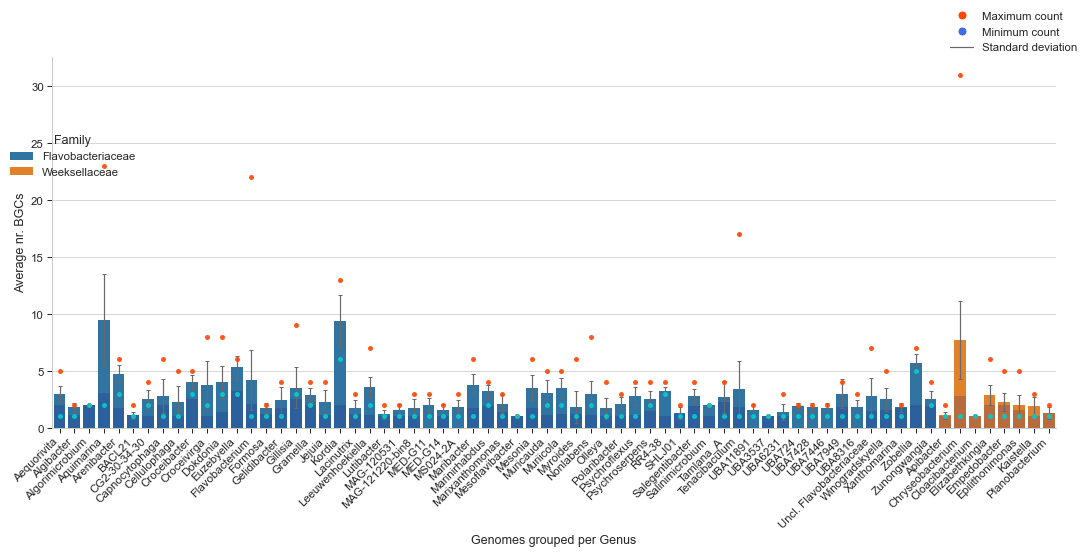

In [45]:
sns.set_style({'font.family': 'Arial'})
#sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.3) 

finalx = finalx.sort_values(by=["Family","Genus"])
plt.figure(figsize=(17,10))
g = sns.catplot(
    data=finalx, kind="bar", 
    x='Genus', hue="Family",dodge=False, legend_out=True,
    y='Nr_BGCs_mean', 
    height=6, # make the plot 7 units high
    aspect=2.5) # height is n times width

g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "Genus", "Nr_BGCs_mean", "Nr_BGCs_std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='Genus',y='Nr_BGCs_max', data=finalx, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='Genus',y='Nr_BGCs_min', data=finalx, jitter=False, color="darkturquoise", alpha=0.9)

#Second layer, with average known clusters
sns.barplot(x = finalx["Genus"], y =finalx["Known_cluster_count_mean"], data=finalx,color = "#0000A3", alpha=0.2)

plt.xlabel('Genomes grouped per Genus') #, fontsize=15
plt.ylabel('Average nr. BGCs')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("bgcs.pdf")